In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
pd.options.display.max_columns = None
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from imblearn.over_sampling import SMOTE

In [17]:
from sklearn import preprocessing


In [2]:
!pip install missingno

In [278]:
%store -r common_de

In [279]:
common_de.drop('triplex',axis=1,inplace=True)
common_de.drop(['gene_sym'],axis=1,inplace=True)
common_de.drop_duplicates(inplace=True)

Separating with continuous and categorical variables.

In [263]:
pathway_list = common_de.Pathway.drop_duplicates().tolist()

In [276]:
common_de.columns

Index(['proximal_cancer_driver', 'proximal_drug_target', 'promoter_methylated',
       'SNPS', 'negative_correlated_methylation',
       'positive_correlated_methylation', 'sample', 'mechanism', 'functional',
       'clinical', 'Pathway', 'y', 'risk_alelle_freq'],
      dtype='object')

In [277]:
common_de_fil['Meth_Mean']       =pd.to_numeric(common_de_fil.Meth_Mean,
                                                errors='coerce')
common_de_fil['sphase_mean_FC']  =pd.to_numeric(common_de_fil.sphase_mean_FC,
                                                errors='coerce')
common_de_fil['risk_alelle_freq']=pd.to_numeric(common_de_fil.risk_alelle_freq, 
                                                errors='coerce')
common_de_fil['score']           =pd.to_numeric(common_de_fil.score,
                                      errors='coerce')
common_de_fil.drop('Pathway',axis=1,
                   inplace=True)
common_de_fil.drop_duplicates(inplace=True)
common_de_fil.shape

AttributeError: 'DataFrame' object has no attribute 'Meth_Mean'

In [250]:
%store common_de_fil

Stored 'common_de_fil' (DataFrame)


In [545]:
%store -r common_de

In [465]:
common_de.loc[:, common_de.dtypes == np.object].columns

Index(['sample', 'proximal_cancer_driver', 'proximal_drug_target',
       'promoter_methylated', 'SNPS', 'negative_correlated_methylation',
       'positive_correlated_methylation', 'types', 'mechanism', 'functional',
       'clinical'],
      dtype='object')

In [526]:
X_df.select_dtypes(exclude = ['object']).columns.to_list()

['logFC',
 'proximal_cancer_driver',
 'Meth_Mean',
 'sphase_mean_FC',
 'score',
 'clinical',
 'risk_alelle_freq',
 'BRCA',
 'COAD',
 'ESCA',
 'HNSC',
 'KICH',
 'KIRC',
 'KIRP',
 'LIHC',
 'LUAD',
 'LUSC',
 'PAAD',
 'PRAD',
 'STAD',
 'THCA']

In [518]:
common_de.columns

Index(['logFC', 'sample', 'proximal_cancer_driver', 'proximal_drug_target',
       'promoter_methylated', 'SNPS', 'negative_correlated_methylation',
       'positive_correlated_methylation', 'types', 'Meth_Mean',
       'sphase_mean_FC', 'score', 'mechanism', 'functional', 'clinical', 'y',
       'risk_alelle_freq'],
      dtype='object')

In [178]:
# Creating dummy variable dataframe from categorical variables.
#X_df = cont_df.join(pd.get_dummies(cat_df))

In [546]:
common_de = common_de.query('sample !=0')
BRCA      = common_de.query('sample=="BRCA"')
X_df      = BRCA.drop(['y','proximal_drug_target','negative_correlated_methylation',
                          'positive_correlated_methylation','promoter_methylated','mechanism','SNPS','types','functional','proximal_cancer_driver','clinical'], axis=1)

In [543]:
X_df.shape

(2114, 6)

In [547]:
y       = BRCA['y']
X_cat   = list(X_df.select_dtypes(['object']).columns)
X_cont  = ['logFC']
cont_df = X_df[X_cont]
cat_df  = X_df[X_cat]
#X_df['types']      = X_df['types'].replace([0,'0'],'No')
#X_df['clinical']   = X_df['clinical'].replace([0,'0'],'No')
#X_df['functional'] = X_df['functional'].replace(['0',0],'No')
#X_df['mechanism']  = X_df['mechanism'].replace(['0',0],'No')
#X_df['promoter_methylated']  = X_df['promoter_methylated'].replace(0,'No')


# Label encode categorical variables.
label_encoder = LabelEncoder()
mappings      = []

# Desired label orders for categorical columns.
#clinical_order   = X_df.clinical.drop_duplicates().to_list()

"""
mechanism_order  = X_df.mechanism.drop_duplicates().to_list()
types_order      = X_df.types.drop_duplicates().to_list()
proximal_cancer_driver_order = X_df.proximal_cancer_driver.drop_duplicates().to_list()
promoter_methylated_order    = X_df.promoter_methylated.drop_duplicates().to_list()
SNPS_order                   = X_df.SNPS.drop_duplicates().to_list()
negative_correlated_methylation_order = X_df.negative_correlated_methylation.drop_duplicates().to_list()
positive_correlated_methylation_order = X_df.positive_correlated_methylation.drop_duplicates().to_list()
promoter_methylated_order = X_df.promoter_methylated.drop_duplicates().to_list()
"""
#sample_order     = X_df['sample'].drop_duplicates().to_list()
# using cat.codes for order, one hot for high cardinality and weak case of cardinality.

def ordered_labels(df, col, order):
    df[col] = df[col].astype('category')
    df[col] = df[col].cat.reorder_categories(order, ordered=True)
    df[col] = df[col].cat.codes.astype(int)
    
# Use dummy variables for occupation
X_df = pd.concat([X_df, pd.get_dummies(X_df['sample'])],axis=1).drop('sample',axis=1)
# Use ordered cat.codes for days, months, and education


In [430]:
promoter_methylated_order

['No', 'Yes']

In [353]:
 X_df.types.drop_duplicates().to_list()

['No', 't', 'o', 'ot']

In [506]:
ordered_labels(X_df, 'types', types_order)
#ordered_labels(X_df, 'sample', sample_order)
#ordered_labels(X_df, 'clinical', clinical_order)
ordered_labels(X_df, 'functional', functional_order)
#ordered_labels(X_df, 'mechanism', mechanism_order)
#ordered_labels(X_df, 'proximal_cancer_driver', proximal_cancer_driver_order)
#ordered_labels(X_df, 'promoter_methylated', promoter_methylated_order)
#ordered_labels(X_df, 'SNPS', SNPS_order)
#ordered_labels(X_df, 'negative_correlated_methylation', negative_correlated_methylation_order)
#ordered_labels(X_df, 'positive_correlated_methylation', positive_correlated_methylation_order)


In [507]:
ordered_labels(X_df, 'promoter_methylated', promoter_methylated_order)


KeyError: 'promoter_methylated'

In [548]:
# Same label encoding for rest since low cardinality
for i, col in enumerate(X_df):
    if X_df[col].dtype == 'object':
        X_df[col] = label_encoder.fit_transform(np.array(X_df[col].astype(str)).reshape((-1,)))
        mappings.append(dict(zip(label_encoder.classes_, range(1, len(label_encoder.classes_)+1))))
X_df.fillna(0,inplace=True)
X_df.head()

,logFC,Meth_Mean,sphase_mean_FC,score,risk_alelle_freq,BRCA
9,-1.307162,0.0,0.666667,0.0,0.0,1
18,-1.693635,0.0,0.000000,0.0,0.0,1
23,0.668899,0.0,0.000000,0.0,0.0,1
58,-0.689454,0.0,0.000000,0.0,0.0,1
69,-1.296427,0.0,0.000000,0.0,0.0,1


In [549]:
# Split feature and label sets to train and data sets.
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size = 0.2, random_state = 10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1691, 6), (423, 6), (1691,), (423,))

In [550]:
# Normalize using MinMaxScaler to constrain values to between 0 and 1.
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

In [551]:
# Create first pipeline for base without reducing features.

pipe = Pipeline([('classifier' , RandomForestClassifier())])
# pipe = Pipeline([('classifier', RandomForestClassifier())])

# Create param grid.

param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']},
    {'classifier' : [RandomForestClassifier()],
    'classifier__n_estimators' : list(range(10,101,10)),
    'classifier__max_features' : list(range(6,32,5))}
]

# Create grid search object

clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

# Fit on data

best_clf = clf.fit(X_train, y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


/home/alva/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [0.61561153 0.61561153 0.61561153 0.61561153 0.61561153 0.61561153
 0.61561153 0.61561153 0.61561153 0.61561153 0.61561153 0.61561153
 0.61561153 0.61620324 0.66528949 0.66528949 0.6658812  0.6658812
 0.6658812  0.6658812  0.6658812  0.6658812  0.6658812  0.6658812
 0.66528949 0.66469777 0.66528949 0.66469777 0.66469777 0.66469777
 0.66469777 0.66528949 0.66528949 0.66528949 0.66528949 0.66528949
 0.66528949 0.66528949 0.66528949 0.66528949 0.59252239 0.58128153
 0.5806933  0.58246496 0.58186975 0.5800981  0.5818715  0.58068807
 0.58127978 0.58068807        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan     

In [552]:
best_clf.best_estimator_.get_params()['classifier']
# type=LogisticRegression(C=4.281332398719396, penalty='l1', solver='liblinear')


LogisticRegression(C=0.23357214690901212, penalty='l1', solver='liblinear')

In [553]:
print('Model accuracy is',best_clf.score(X_test, y_test))

Model accuracy is 0.6619385342789598


In [444]:
best_clf

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid=[{'classifier': [LogisticRegression(C=0.615848211066026,
                                                            penalty='l1',
                                                            solver='liblinear')],
                          'classifier__C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e...
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'classifier__penalty': ['l1', 'l2'],
                          'classifier__solver': ['liblinear']},
                         {'classifier': [RandomForestClassifier()],
                          'classifier__max_features

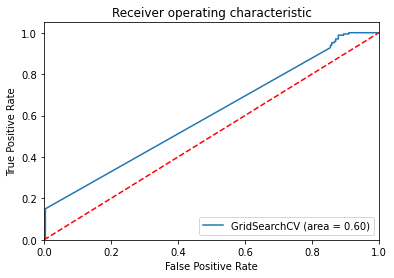

In [554]:
probs = best_clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='GridSearchCV (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [555]:
roc_auc

0.6021940494011976

In [556]:
classes = best_clf.predict(X_test)
    
accuracy = metrics.accuracy_score(classes, y_test)
    
balanced_accuracy = metrics.balanced_accuracy_score(classes, y_test)

precision = metrics.precision_score(classes, y_test)
    
average_precision = metrics.average_precision_score(classes, y_test)
    
f1_score = metrics.f1_score(classes, y_test)
    
recall = metrics.recall_score(classes, y_test)

print (accuracy, balanced_accuracy, precision, average_precision, f1_score, recall, roc_auc)


0.6619385342789598 0.8019279209455532 0.1497005988023952 0.14630694965769497 0.25906735751295334 0.9615384615384616 0.6021940494011976


In [448]:
print(metrics.classification_report(classes, y_test))


              precision    recall  f1-score   support

         0.0       0.99      0.64      0.78      4661
         1.0       0.18      0.93      0.30       386

    accuracy                           0.66      5047
   macro avg       0.58      0.79      0.54      5047
weighted avg       0.93      0.66      0.74      5047



In [557]:
# Rerunning above with resampled data
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
best_clf = clf.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/home/alva/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [0.5        0.53794388 0.5        0.53890311 0.5        0.55138697
 0.5        0.55666505 0.5        0.56147505 0.5        0.5763593
 0.51153846 0.57682623 0.56820121 0.58499816 0.57155391 0.58451854
 0.58451969 0.58499931 0.58451969 0.58404008 0.58500161 0.58548123
 0.58548123 0.58548123 0.58500046 0.58548123 0.58548123 0.58548123
 0.58548123 0.58548123 0.58548123 0.58548123 0.58548123 0.58548123
 0.58548123 0.58548123 0.58548123 0.58548123 0.61287124 0.60326277
 0.59942123 0.60134316 0.59894162 0.59606046 0.59845969 0.59750046
 0.59845854 0.59894046        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan    

In [558]:
best_clf.best_estimator_.get_params()['classifier']
print('Model accuracy is',best_clf.score(X_test, y_test))


Model accuracy is 0.5721040189125296


In [560]:
best_clf

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid=[{'classifier': [LogisticRegression(C=0.23357214690901212,
                                                            penalty='l1',
                                                            solver='liblinear')],
                          'classifier__C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.3357214...
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'classifier__penalty': ['l1', 'l2'],
                          'classifier__solver': ['liblinear']},
                         {'classifier': [RandomForestClassifier(max_features=6,
                                       